# Notebook responsável por gerar a EDA da série temporal

In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sktime.datasets import load_airline
from statsmodels.tsa.seasonal import seasonal_decompose

## Geração da visualização dos dados "Box & Jenkins airline data"

In [2]:
y = load_airline()
df = y.to_frame().reset_index()
df

,Period,Number of airline passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0
...,...,...
139,1960-08,606.0
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0


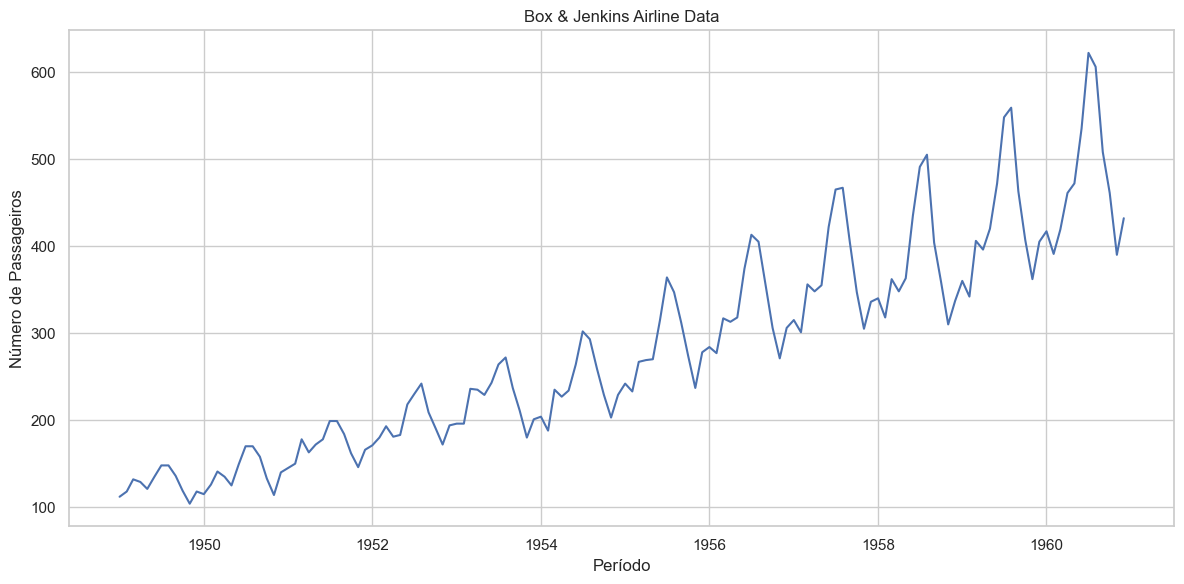

In [3]:
# Configurando o estilo do gráfico
sns.set(style="whitegrid")

# Convertendo os períodos para datetime para facilitar a visualização
df['Period'] = df['Period'].dt.to_timestamp()

# Criando a visualização
plt.figure(figsize=(12, 6))
sns.lineplot(x="Period", y='Number of airline passengers', data=df)
plt.title('Box & Jenkins Airline Data')
plt.xlabel('Período')
plt.ylabel('Número de Passageiros')

plt.tight_layout()

# Salvando a figura no diretório especificado
plt.savefig('../figs/01 - Box_Jenkins_Airline_Data.png')

# Exibindo o gráfico
plt.show()

## Decomposição da série temporal em 

In [4]:
# Garantindo que o índice do DataFrame é a coluna de períodos para que a função seasonal_decompose funcione corretamente
df_dec = df.set_index('Period')

# Decompondo a série temporal
result = seasonal_decompose(df_dec['Number of airline passengers'], model='additive', period=12)
# Decompondo a série temporal
#result = seasonal_decompose(df['Period'], model='additive')
df["tendencia"] = result.trend.values
df["sazonalidade"] = result.seasonal.values
df["residuos"] = result.resid.values

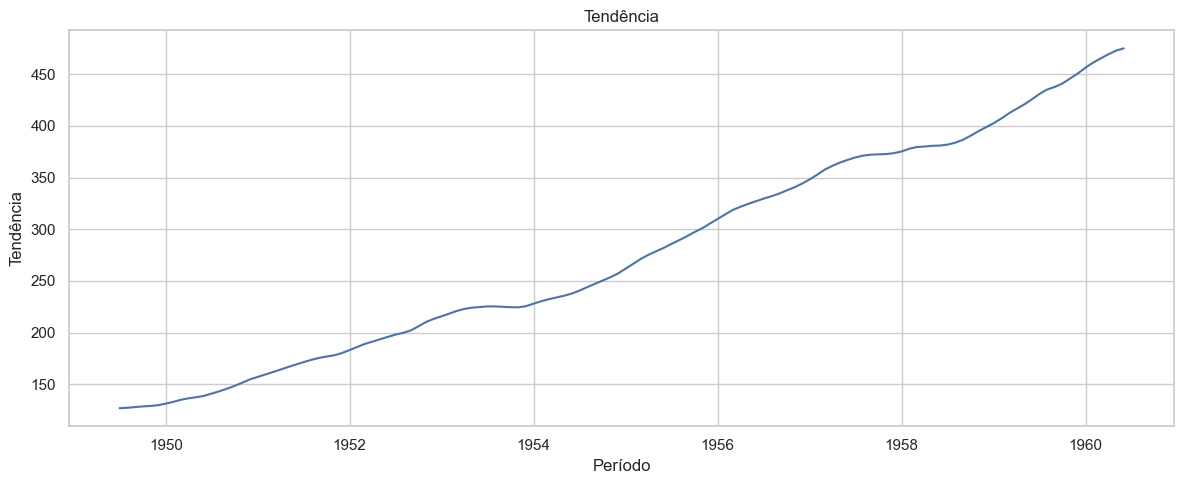

In [8]:
# Tendência
plt.figure(figsize=(12, 5))
plt.plot(df['Period'], df["tendencia"], label='Tendência')
plt.title('Tendência')
plt.ylabel('Tendência')
plt.xlabel('Período')
plt.tight_layout()

# Salvando a figura no diretório especificado
plt.savefig('../figs/03 - Decomposicao_serie_tendencia.png')
plt.show()

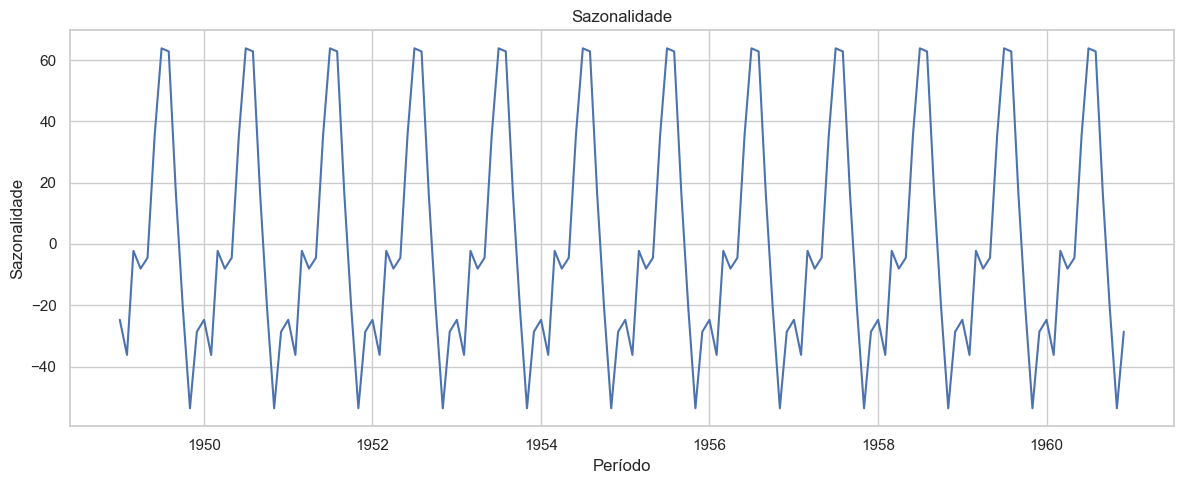

In [9]:
# Sazonalidade
plt.figure(figsize=(12, 5))
plt.plot(df['Period'], df["sazonalidade"], label='Sazonalidade')
plt.title('Sazonalidade')
plt.ylabel('Sazonalidade')
plt.xlabel('Período')
plt.tight_layout()

# Salvando a figura no diretório especificado
plt.savefig('../figs/04 - Decomposicao_serie_sazonalidade.png')

plt.show()

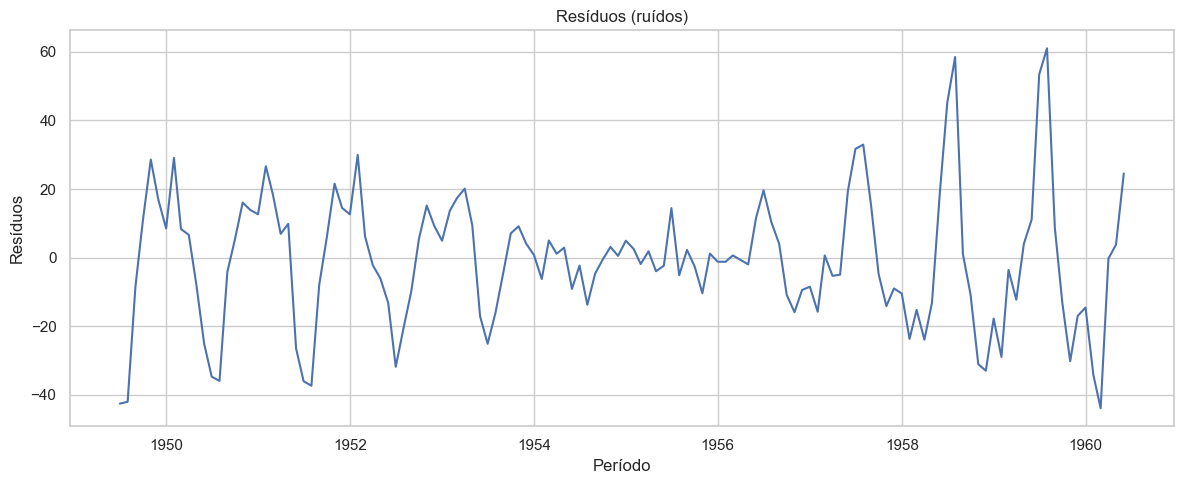

In [10]:
# Resíduo
plt.figure(figsize=(12, 5))
plt.plot(df['Period'], df["residuos"], label='Resíduos')
plt.title('Resíduos (ruídos)')
plt.ylabel('Resíduos')
plt.xlabel('Período')
plt.tight_layout()

# Salvando a figura no diretório especificado
plt.savefig('../figs/05 - Decomposicao_serie_ruido.png')


plt.show()